<a href="https://colab.research.google.com/github/LJ1201/MSDS-490-Bank_Campaign/blob/main/BankMkting_Finalized%20Logistic%20Regression%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import packages

In [317]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Import dataset

Data Source: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


##Attribute Information:

Input variables:

#Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')



Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)


17 - cons.price.idx: consumer price index - monthly indicator (numeric)


18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)


19 - euribor3m: euribor 3 month rate - daily indicator (numeric)


20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):


21 - y - has the client subscribed a term deposit? (binary: 'yes','no')




#Relevant Papers:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. [bank.zip]



In [318]:
url = 'https://raw.githubusercontent.com/LJ1201/MSDS-490-Bank_Campaign/main/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

##EDA

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##Categroical Variables

Categorical variables needs to be transformed into a form the model would take in. One hot encoding is a common way to perform the task

In [320]:
objList = []

for i in data.dtypes.index :
    if i =='y':continue
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if data.dtypes[i] in (["object"]) : objList.append( i )


In [321]:
objList

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [322]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [323]:
data['education'].value_counts()

data_1 = data.copy()
data_1 = data_1[data_1['education'] != 'illiterate']

data_1['edu_new'] = data_1['education'].map({'basic.4y': 'pre_high', 
                                         'basic.9y': 'pre_high',
                                         'basic.6y': 'pre_high',
                                         'university.degree' : 'post_high',
                                         'professional.course':'post_high',
                                         'high.school' : 'high',
                                         'unknown' :'unknown' })

In [324]:
def map_job(row):
    if row['job'] in ['admin.', 'management', 'entrepreneur','self-employed']:
        cat = 'white_collar'
    elif row['job'] in ['housemaid', 'blue-collar', 'technician', 'services']:
        cat = 'blue_collar'
    elif row['job'] in ['student', 'retired', 'unemployed']:
        cat = 'not_working'
    else:
        cat = 'unknown'
    return cat

data_1['job_new'] = data_1.apply(map_job, axis=1)
data_1['job_new'].value_counts(dropna = False)

blue_collar     21017
white_collar    16217
not_working      3606
unknown           330
Name: job_new, dtype: int64

In [325]:
def map_month(row):
    if row['month'] in ['mar', 'apr', 'may']:
        cat = 'spring'
    elif row['month'] in ['jun', 'jul', 'aug']:
        cat = 'summer'
    elif row['month'] in ['sep', 'oct', 'nov']:
        cat = 'fall'
    else:
        cat = 'winter'
    return cat

data_1['season'] = data_1.apply(map_month, axis=1)
data_1['season'].value_counts(dropna = False)

summer    18660
spring    16942
fall       5386
winter      182
Name: season, dtype: int64

In [326]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'edu_new', 'job_new',
       'season'],
      dtype='object')

### Data Transformation - V1 (Agreed on Team Discussion)

In [327]:
#This transformed dataframe is based on group discussion on 7/23
# - keep all numerical features as they are
# - consolidate categorical features (education, job, season) and drop originial ones

df_tran_1 = data_1[['age', 'marital', 'default', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'edu_new', 'job_new', 'season']]

In [328]:
df_tran_1.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'edu_new', 'job_new', 'season'],
      dtype='object')

In [329]:
df_tran_1.head().T

,0,1,2,3,4
age,56,57,37,40,56
marital,married,married,married,married,married
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
day_of_week,mon,mon,mon,mon,mon
campaign,1,1,1,1,1
pdays,999,999,999,999,999
previous,0,0,0,0,0


In [330]:
df_tran_1.y.value_counts()

no     36534
yes     4636
Name: y, dtype: int64

In [331]:
df_tran_1.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'edu_new', 'job_new', 'season'],
      dtype='object')

In [332]:
df_tran_1.head().T

,0,1,2,3,4
age,56,57,37,40,56
marital,married,married,married,married,married
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
day_of_week,mon,mon,mon,mon,mon
campaign,1,1,1,1,1
pdays,999,999,999,999,999
previous,0,0,0,0,0


In [333]:
df_tran_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41170 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41170 non-null  int64  
 1   marital         41170 non-null  object 
 2   default         41170 non-null  object 
 3   housing         41170 non-null  object 
 4   loan            41170 non-null  object 
 5   contact         41170 non-null  object 
 6   day_of_week     41170 non-null  object 
 7   campaign        41170 non-null  int64  
 8   pdays           41170 non-null  int64  
 9   previous        41170 non-null  int64  
 10  poutcome        41170 non-null  object 
 11  emp.var.rate    41170 non-null  float64
 12  cons.price.idx  41170 non-null  float64
 13  cons.conf.idx   41170 non-null  float64
 14  euribor3m       41170 non-null  float64
 15  nr.employed     41170 non-null  float64
 16  y               41170 non-null  object 
 17  edu_new         41170 non-null 

In [334]:
df_tran_1.dtypes.index

Index(['age', 'marital', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'edu_new', 'job_new', 'season'],
      dtype='object')

In [335]:
objList = []

for i in df_tran_1.dtypes.index :
    if i =='y':continue
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if df_tran_1.dtypes[i] in (["object"]) : objList.append( i )

for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df_tran_1[i], prefix=thePrefix, drop_first=True )   
    df_tran_1 = pd.concat( [df_tran_1, y], axis=1 )
    df_tran_1 = df_tran_1.drop( i, axis=1 )

In [336]:
objList

['marital',
 'default',
 'housing',
 'loan',
 'contact',
 'day_of_week',
 'poutcome',
 'edu_new',
 'job_new',
 'season']

In [337]:
df_tran_1.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'z_marital_married', 'z_marital_single', 'z_marital_unknown',
       'z_default_unknown', 'z_default_yes', 'z_housing_unknown',
       'z_housing_yes', 'z_loan_unknown', 'z_loan_yes', 'z_contact_telephone',
       'z_day_of_week_mon', 'z_day_of_week_thu', 'z_day_of_week_tue',
       'z_day_of_week_wed', 'z_poutcome_nonexistent', 'z_poutcome_success',
       'z_edu_new_post_high', 'z_edu_new_pre_high', 'z_edu_new_unknown',
       'z_job_new_not_working', 'z_job_new_unknown', 'z_job_new_white_collar',
       'z_season_spring', 'z_season_summer', 'z_season_winter'],
      dtype='object')

In [338]:
df_tran_1['y'] = df_tran_1.y.map(dict(yes=1, no=0))

In [339]:
df_tran_1['y'].value_counts()

0    36534
1     4636
Name: y, dtype: int64

In [340]:

X = df_tran_1.loc[:, df_tran_1.columns != 'y']
y = df_tran_1.loc[:, df_tran_1.columns == 'y']

In [341]:
y.value_counts()

y
0    36534
1     4636
dtype: int64

In [342]:
y_test

,y
16889,0
31728,0
39360,0
23192,0
22566,0
...,...
37883,0
11587,0
4929,0
37060,0


In [343]:

X = df_tran_1.loc[:, df_tran_1.columns != 'y']
y = df_tran_1.loc[:, df_tran_1.columns == 'y']


os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51102
Number of no subscription in oversampled data 25551
Number of subscription 25551
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [344]:
y_test.value_counts()

y
0    10983
1     1368
dtype: int64

In [345]:
y_train.value_counts()

y
0    25551
1     3268
dtype: int64

In [346]:
X

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,z_marital_married,...,z_poutcome_success,z_edu_new_post_high,z_edu_new_pre_high,z_edu_new_unknown,z_job_new_not_working,z_job_new_unknown,z_job_new_white_collar,z_season_spring,z_season_summer,z_season_winter
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,1,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,1,0,0,0,0,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,0,0,0,0,0,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,1,0,0,0,0,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,0,0,0,0,0,0


In [347]:
data_final_vars=df_tran_1.columns.values.tolist()

logreg = LogisticRegression(solver= 'liblinear')
rfe = RFE(logreg,n_features_to_select=20)
rfe = rfe.fit(os_data_X.values, os_data_y.values.ravel())

features = list(os_data_X.columns[rfe.support_])

print('total features:', os_data_X.shape[1])

print(rfe.support_)
print(features)
print(rfe.ranking_)

total features: 34
[False False False False False False False False False  True  True  True
  True  True  True False  True  True  True  True  True  True  True False
  True  True  True  True False  True  True False False  True]
['z_marital_married', 'z_marital_single', 'z_marital_unknown', 'z_default_unknown', 'z_default_yes', 'z_housing_unknown', 'z_loan_unknown', 'z_loan_yes', 'z_contact_telephone', 'z_day_of_week_mon', 'z_day_of_week_thu', 'z_day_of_week_tue', 'z_day_of_week_wed', 'z_poutcome_success', 'z_edu_new_post_high', 'z_edu_new_pre_high', 'z_edu_new_unknown', 'z_job_new_unknown', 'z_job_new_white_collar', 'z_season_winter']
[15  9 14  3 11 10 13  5 12  1  1  1  1  1  1  2  1  1  1  1  1  1  1  6
  1  1  1  1  7  1  1  8  4  1]


##Fit Model

##Model 1

Logistic Regression with top 20 selected by Recursive Feature Elimination method

In [348]:
features

['z_marital_married',
 'z_marital_single',
 'z_marital_unknown',
 'z_default_unknown',
 'z_default_yes',
 'z_housing_unknown',
 'z_loan_unknown',
 'z_loan_yes',
 'z_contact_telephone',
 'z_day_of_week_mon',
 'z_day_of_week_thu',
 'z_day_of_week_tue',
 'z_day_of_week_wed',
 'z_poutcome_success',
 'z_edu_new_post_high',
 'z_edu_new_pre_high',
 'z_edu_new_unknown',
 'z_job_new_unknown',
 'z_job_new_white_collar',
 'z_season_winter']

In [349]:
X

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,z_marital_married,...,z_poutcome_success,z_edu_new_post_high,z_edu_new_pre_high,z_edu_new_unknown,z_job_new_not_working,z_job_new_unknown,z_job_new_white_collar,z_season_spring,z_season_summer,z_season_winter
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,0,1,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,0,1,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,1,0,0,0,1,1,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,1,0,0,0,0,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,0,0,0,0,0,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,1,0,0,0,0,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,...,0,1,0,0,0,0,0,0,0,0


In [350]:
X = X[features]

In [351]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.322052
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


                                                     Results: Logit
Model:                                 Logit                              Pseudo R-squared:                   0.085     
Dependent Variable:                    y                                  AIC:                                26555.7461
Date:                                  2022-08-14 18:03                   BIC:                                26719.6299
No. Observations:                      41170                              Log-Likelihood:                     -13259.   
Df Model:                              18                                 LL-Null:                            -14489.   
Df Residuals:                          41151                              LLR p-value:                        0.0000    
Converged:                             0.0000                             Scale:                              1.0000    
No. Iterations:                        35.0000                                       

In [352]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [353]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [354]:
cm_1 = confusion_matrix(y_test, y_pred)
print(cm_1)

[[10888    95]
 [ 1122   246]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


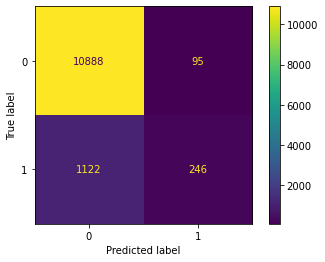

In [355]:
plot_confusion_matrix(logreg, X_test, y_test)  
plt.show()

In [356]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10983
           1       0.72      0.18      0.29      1368

    accuracy                           0.90     12351
   macro avg       0.81      0.59      0.62     12351
weighted avg       0.89      0.90      0.87     12351



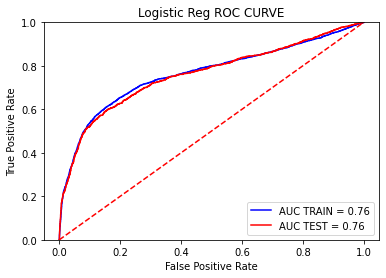

In [359]:
#define metrics
y_pred_proba_test = logreg.predict_proba(X_test)[::,1]
fpr_test, tpr_test, _ = metrics.roc_curve(y_test,  y_pred_proba_test)
auc_test = metrics.roc_auc_score(y_test, y_pred_proba_test)

y_pred_proba_train = logreg.predict_proba(X_train)[::,1]
fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  y_pred_proba_train)
auc_train = metrics.roc_auc_score(y_train, y_pred_proba_train)


#create ROC curve
plt.title('Logistic Reg ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % auc_test, color = 'red')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0,1], 'r--')
plt.ylim([0, 1])
plt.show()
plt.show()

In [364]:
auc_test

0.760291123762242

In [361]:
for i in range(0, len(fpr_test), int(len(fpr_test))//9):
  print(fpr_train[i])

0.0
0.02837462330241478
0.06669014911353763
0.1306798168369144
0.23306328519431724
0.3783022190912293
0.5706625963758757
0.7244726233806896
0.8661109154240538
0.9977691675472584


In [363]:
for i in range(0, len(tpr_test), int(len(tpr_test))//9):
  print(tpr_test[i])

0.0
0.26242690058479534
0.4108187134502924
0.5394736842105263
0.6345029239766082
0.7302631578947368
0.8026315789473685
0.8662280701754386
0.9334795321637427
1.0


###Model 2

In [358]:
features

['z_marital_married',
 'z_marital_single',
 'z_marital_unknown',
 'z_default_unknown',
 'z_default_yes',
 'z_housing_unknown',
 'z_loan_unknown',
 'z_loan_yes',
 'z_contact_telephone',
 'z_day_of_week_mon',
 'z_day_of_week_thu',
 'z_day_of_week_tue',
 'z_day_of_week_wed',
 'z_poutcome_success',
 'z_edu_new_post_high',
 'z_edu_new_pre_high',
 'z_edu_new_unknown',
 'z_job_new_unknown',
 'z_job_new_white_collar',
 'z_season_winter']

In [ ]:
features_2 = features.copy()

features_2.remove('z_marital_divorced')

features_2.remove('z_marital_unknown')

# features_2.remove('z_edu_new_post_high')

In [ ]:
X = os_data_X[features_2]
y = os_data_y['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=21)
logreg_2 = LogisticRegression()
logreg_2.fit(X_train_2, y_train_2)


In [ ]:
y_pred_2 = logreg_2.predict(X_test_2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_2.score(X_test_2, y_test_2)))

In [ ]:
cm_2 = confusion_matrix(y_test_2, y_pred_2)
print(cm_2)
print(classification_report(y_test_2, y_pred_2))

In [ ]:
#define metrics
y_pred_proba_test = logreg_2.predict_proba(X_test_2)[::,1]
fpr_test, tpr_test, _ = metrics.roc_curve(y_test_2,  y_pred_proba_test)
auc_test = metrics.roc_auc_score(y_test_2, y_pred_proba_test)

y_pred_proba_train = logreg_2.predict_proba(X_train_2)[::,1]
fpr_train, tpr_train, _ = metrics.roc_curve(y_train_2,  y_pred_proba_train)
auc_train = metrics.roc_auc_score(y_train_2, y_pred_proba_train)


#create ROC curve
plt.title('Logistic Reg 2 ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % auc_test, color = 'red')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0,1], 'r--')
plt.ylim([0, 1])
plt.show()
plt.show()

##Test on Original data excluding oversampling data points using Logistic regression model

In [ ]:
df_tran_1

In [ ]:
After_test_X = df_tran_1[features]
After_test_Y = df_tran_1['y']

In [ ]:
y_pred_3 = logreg.predict(After_test_X)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(After_test_X, After_test_Y)))